Project Proposal: Crop Recommendation Using AI Techniques
1. Problem Statement
In the agriculture sector, selecting the right crop to cultivate based on environmental and soil conditions is crucial for maximizing yield and sustainability. Farmers often rely on experience or guesswork, which may lead to suboptimal outcomes. This project aims to develop a machine learning model to recommend the most suitable crop to grow, based on soil nutrients and climatic parameters.

2. Dataset Description

Dataset Name: Crop Recommendation Dataset

Source: [Kaggle or similar public repository – insert actual source URL or name if known]

Samples: 2200 rows

Features: 7 input features and 1 label

Input Features:

N: Nitrogen content in the soil

P: Phosphorous content

K: Potassium content

temperature: Average temperature in °C

humidity: Average relative humidity in %

ph: Soil pH value

rainfall: Average rainfall in mm

Target Variable (Label): label (recommended crop)

Label Classes: 22 different crop types (e.g., rice, maize, chickpea, etc.)

Data Quality: No missing values; dataset is clean and well-structured

Class Balance: All 22 classes are present with sufficient samples.

3. AI Techniques to Be Used
The following AI/ML techniques will be applied and compared for performance:

Artificial Neural Networks (ANNs): To capture complex patterns between environmental factors and crop types.

Deep Convolutional Neural Networks (CNNs): Adapted to tabular data for comparison, possibly by converting data into image-like formats or using 1D CNNs.

Support Vector Machines (SVMs): To perform classification with a focus on maximizing the margin between crop class boundaries.

Clustering Approaches (e.g., K-Means): To explore unsupervised grouping of environmental conditions and analyze natural crop clusters.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
print(df['label'].unique())
print(df['label'].value_counts())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [5]:
print("Unique classes in original df:", df['label'].nunique())  # Should print 22

Unique classes in original df: 22


In [6]:
print(df['label'])

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


# Data Preprocessing

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
duplicates_all = df[df.duplicated()]
print(duplicates_all)

Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [12]:
# drop duplicate data
df.drop_duplicates(inplace=True)
df.shape

(2200, 8)

In [14]:
# removes  Nan value .
df.dropna(inplace =True)

In [15]:
#  Nan Value in the dataframe
df.isnull().any().any()

False

In [16]:
#Count the nan value
df.isnull().sum().sum()

0

In [17]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [18]:
df['N'].unique()

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134], dtype=int64)

In [19]:
df['P'].unique()

array([ 42,  58,  55,  35,  37,  53,  54,  46,  56,  50,  48,  38,  45,
        40,  59,  41,  47,  49,  51,  57,  39,  43,  44,  60,  52,  36,
        72,  67,  73,  70,  62,  74,  66,  63,  71,  78,  80,  68,  65,
        77,  76,  79,  61,  64,  69,  75,  24,  18,  26,  27,  25,  21,
        30,  11,   5,  10,   7,  20,  22,  15,  23,   8,  16,  29,  17,
         6,  19,  13,   9,  14,  28,  94,  95,  92,  89,  88,  87,  85,
        86,  83,  91,  81,  84,  90,  82,  93,  33,  31,  34,  32, 130,
       144, 123, 125, 131, 140, 122, 134, 145, 139, 141, 138, 136, 132,
       133, 121, 126, 120, 142, 135, 129, 128, 137, 127, 124, 143,  12],
      dtype=int64)

In [20]:
df['K'].unique()

array([ 43,  41,  44,  40,  42,  38,  36,  37,  39,  35,  45,  16,  17,
        21,  20,  19,  25,  22,  15,  18,  23,  24,  77,  84,  85,  81,
        75,  79,  76,  83,  78,  80,  82,  46,  50,  53,  54,  49,  55,
        52,  47,  48,  51,  27,  31,  32,  34,  33,  30,  28,  29,  26,
       195, 204, 205, 196, 198, 197, 203, 201, 202, 199, 200,  12,  13,
         6,   9,  10,  14,   8,   7,   5,  11], dtype=int64)

In [21]:
df['temperature'].unique()

array([20.87974371, 21.77046169, 23.00445915, ..., 24.13179691,
       26.2724184 , 23.60301571])

In [22]:
df['humidity'].unique()

array([82.00274423, 80.31964408, 82.3207629 , ..., 67.22512329,
       52.12739421, 60.39647474])

In [23]:
df['ph'].unique()

array([6.50298529, 7.03809636, 7.84020714, ..., 6.36260785, 6.75879255,
       6.77983261])

In [24]:
df['rainfall'].unique()

array([202.9355362, 226.6555374, 263.9642476, ..., 173.3228386,
       127.1752928, 140.9370415])

In [25]:
#  To clean the Country coloumn
df['N'].unique()
df['N'].value_counts()

N
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64

In [26]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [27]:
print(df['label'].unique())
print(df['label'].value_counts())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [28]:
#  To clean the Country coloumn
df['P'].unique()
df['P'].value_counts()

P
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: count, Length: 117, dtype: int64

In [29]:
df['temperature'].unique()
df['temperature'].value_counts()

temperature
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: count, Length: 2200, dtype: int64

In [30]:
df['humidity'].unique()
df['humidity'].value_counts()

humidity
82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: count, Length: 2200, dtype: int64

In [31]:
df['ph'].unique()
df['ph'].value_counts()

ph
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: count, Length: 2200, dtype: int64

In [32]:
df['rainfall'].unique()
df['rainfall'].value_counts()


rainfall
202.935536    1
26.036577     1
20.390205     1
21.179248     1
21.000099     1
             ..
65.816559     1
63.497263     1
65.628595     1
61.192509     1
140.937041    1
Name: count, Length: 2200, dtype: int64

In [33]:
print(df['label'].unique())
print(df['label'].value_counts())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [34]:
df['label'].unique()
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Outlier Detection 

In [35]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

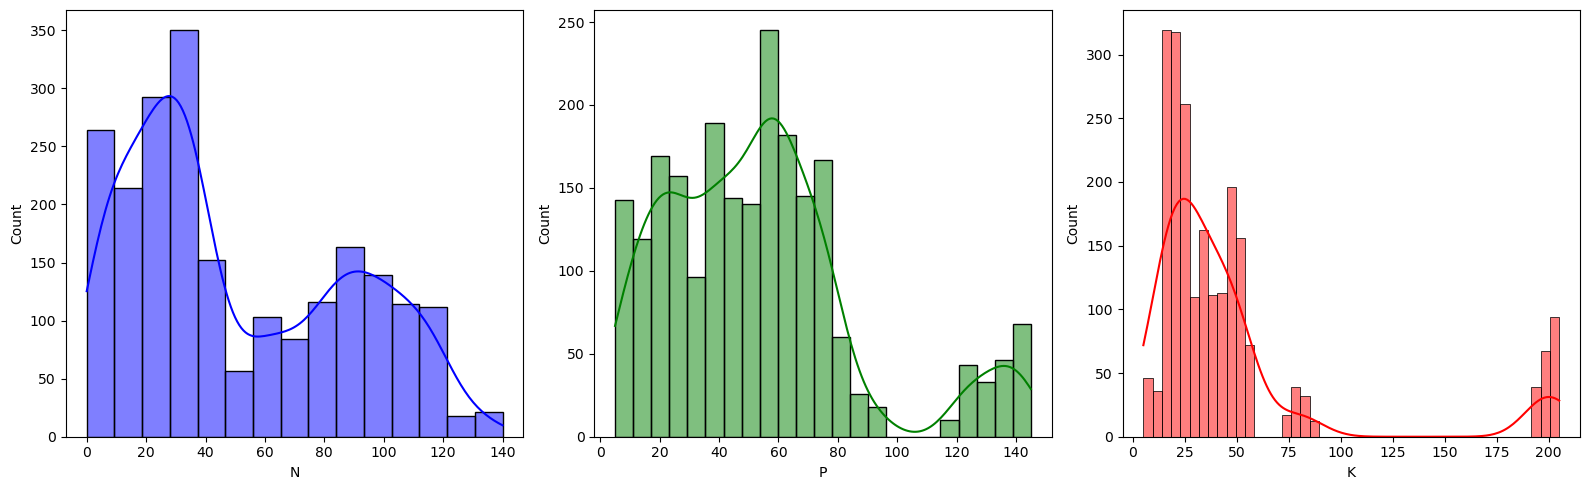

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

# First subplot
plt.subplot(1, 3, 1)  
sns.histplot(df['N'], kde=True, color='blue')  

# Second subplot
plt.subplot(1, 3, 2)  
sns.histplot(df['P'], kde=True, color='green')  
# Third subplot
plt.subplot(1, 3, 3)  # Third column
sns.histplot(df['K'], kde=True, color='red') 

# Show the plots
plt.tight_layout()  
plt.show()


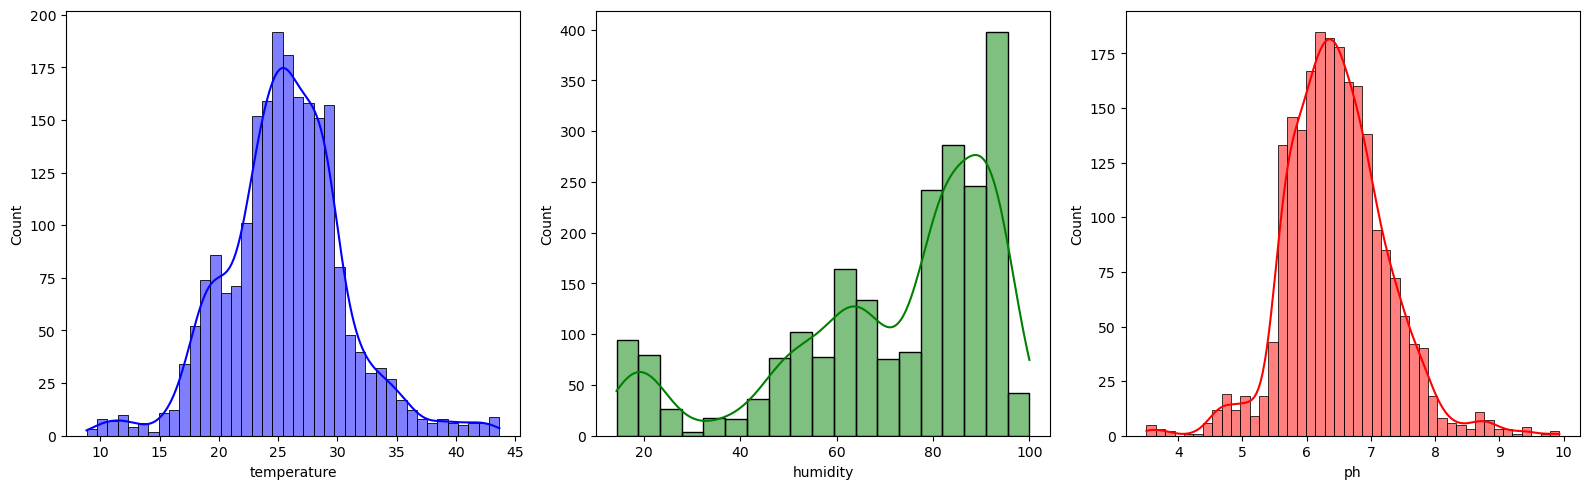

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

# First subplot
plt.subplot(1, 3, 1)  
sns.histplot(df['temperature'], kde=True, color='blue')  

# Second subplot
plt.subplot(1, 3, 2)  
sns.histplot(df['humidity'], kde=True, color='green')  
# Third subplot
plt.subplot(1, 3, 3)  # Third column
sns.histplot(df['ph'], kde=True, color='red') 

# Show the plots
plt.tight_layout()  
plt.show()

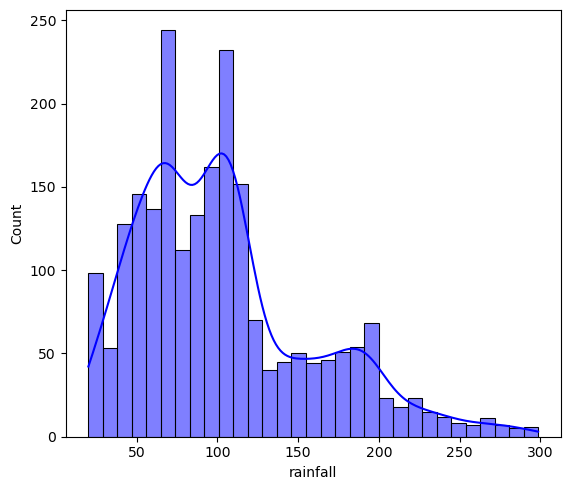

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

# First subplot
plt.subplot(1, 3, 1)  
sns.histplot(df['rainfall'], kde=True, color='blue')  

# Show the plots
plt.tight_layout()  
plt.show()

In [39]:
df['N'].skew()

0.5097213691539147

In [40]:
df['N'].describe()

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64

<Axes: ylabel='N'>

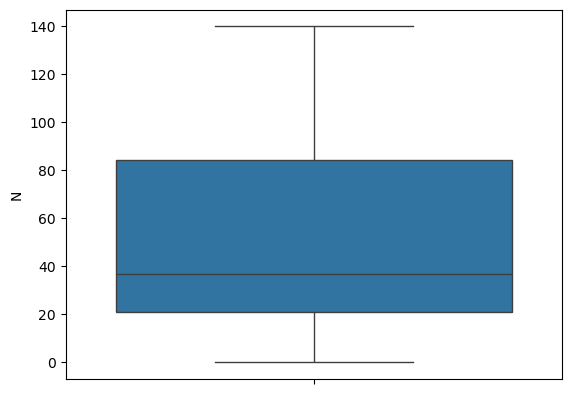

In [41]:
sns.boxplot(df['N'])

In [42]:
df['P'].skew()
df['P'].describe()

count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64

<Axes: ylabel='P'>

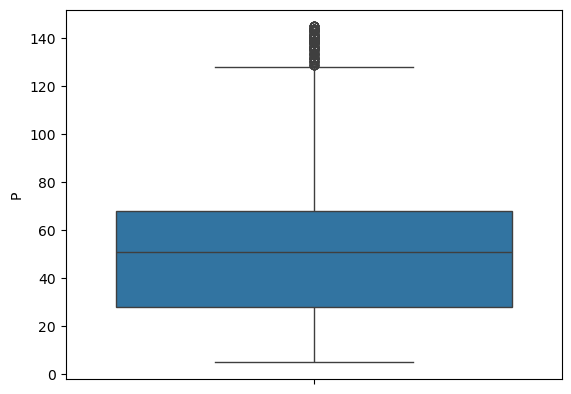

In [43]:
sns.boxplot(df['P'])

In [44]:
percentile25 = df['P'].quantile(0.25)
percentile75 = df['P'].quantile(0.75)
percentile75

68.0

In [45]:
iqr = percentile75 - percentile25
iqr

40.0

In [46]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upperlimit", upper_limit)
print("lowerlimit", lower_limit)

upperlimit 128.0
lowerlimit -32.0


In [47]:
df[df['P']>upper_limit]

,N,P,K,temperature,humidity,ph,rainfall,label
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes
1206,35,140,197,16.775573,82.752419,6.106191,66.762855,grapes
1209,17,134,204,39.040720,80.183933,6.499605,73.884670,grapes
...,...,...,...,...,...,...,...,...
1594,35,145,195,22.039115,94.580758,6.231950,110.980401,apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


In [48]:
df[df['P'] < lower_limit]

,N,P,K,temperature,humidity,ph,rainfall,label


In [49]:
df = df[df['P'] < upper_limit]
df.shape

(2056, 8)

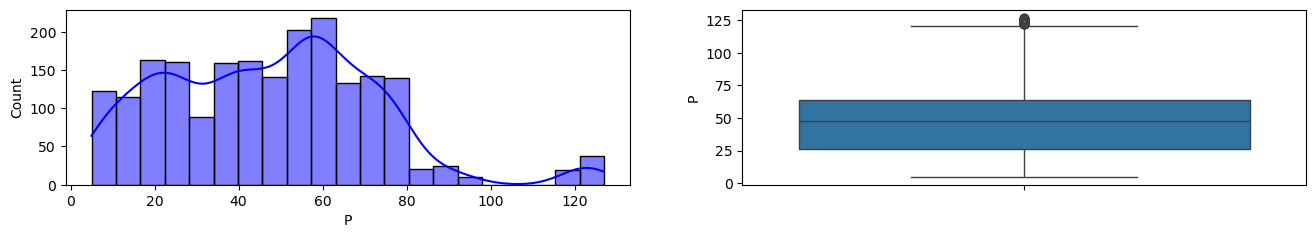

In [50]:
plt.figure(figsize=(16, 5))

# First subplot
plt.subplot(2, 2, 3)  
sns.histplot(df['P'], kde=True, color='blue')
plt.subplot(2, 2, 4) 
sns.boxplot(df['P'])
plt.show()

In [51]:
df['K'].skew()
df['K'].describe()

count    2056.000000
mean       37.519942
std        31.895276
min         5.000000
25%        20.000000
50%        30.000000
75%        46.000000
max       205.000000
Name: K, dtype: float64

<Axes: ylabel='K'>

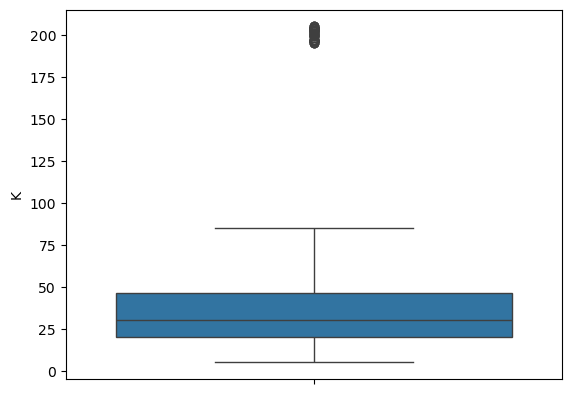

In [52]:
sns.boxplot(df['K'])

In [53]:
percentile25 = df['K'].quantile(0.25)
percentile75 = df['K'].quantile(0.75)
percentile75

46.0

In [54]:
iqr = percentile75 - percentile25
iqr

26.0

In [55]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upperlimit", upper_limit)
print("lowerlimit", lower_limit)

upperlimit 85.0
lowerlimit -19.0


In [56]:
df[df['K']>upper_limit]

,N,P,K,temperature,humidity,ph,rainfall,label
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes
1205,2,123,198,39.648519,82.210799,6.253035,70.399061,grapes
1207,11,122,195,12.141907,83.568125,5.647202,69.631220,grapes
1208,6,123,203,12.756796,81.624974,6.130310,66.778446,grapes
1212,9,122,201,29.587484,80.919344,5.570291,68.064173,grapes
1218,28,122,197,19.893639,82.733664,5.856575,69.662568,grapes
1223,25,121,201,30.507348,82.717756,5.594241,70.082004,grapes
1224,15,125,199,18.426994,80.556259,5.569230,69.757343,grapes
1227,5,126,197,12.800004,81.208764,6.417501,67.104394,grapes


In [57]:
df[df['K'] < lower_limit]

,N,P,K,temperature,humidity,ph,rainfall,label


In [58]:
df = df[df['K'] < upper_limit]
df.shape

(1988, 8)

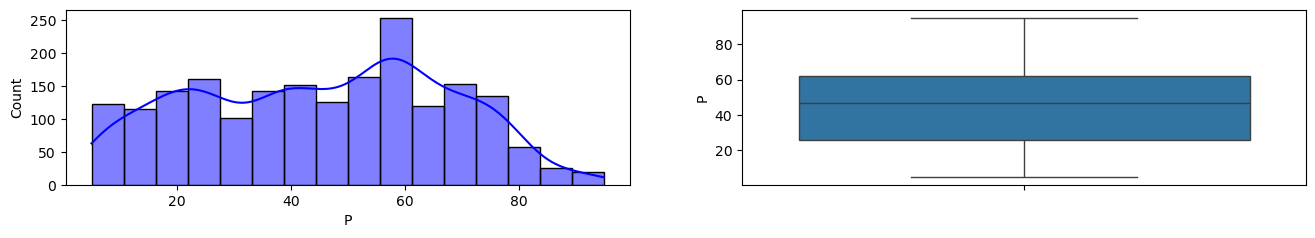

In [59]:
plt.figure(figsize=(16, 5))

# First subplot
plt.subplot(2, 2, 3)  
sns.histplot(df['P'], kde=True, color='blue')
plt.subplot(2, 2, 4) 
sns.boxplot(df['P'])
plt.show()

<Axes: ylabel='humidity'>

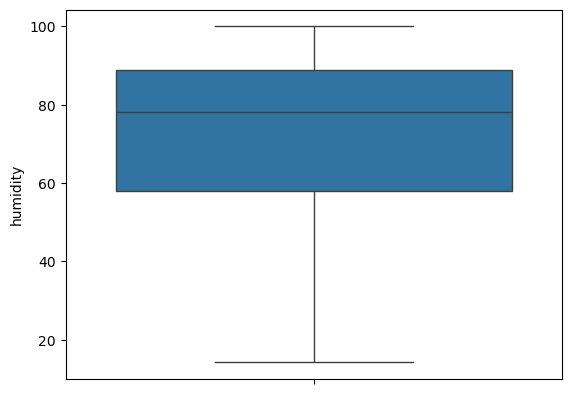

In [60]:
df['humidity'].skew()
df['humidity'].describe()
sns.boxplot(df['humidity'])

<Axes: ylabel='ph'>

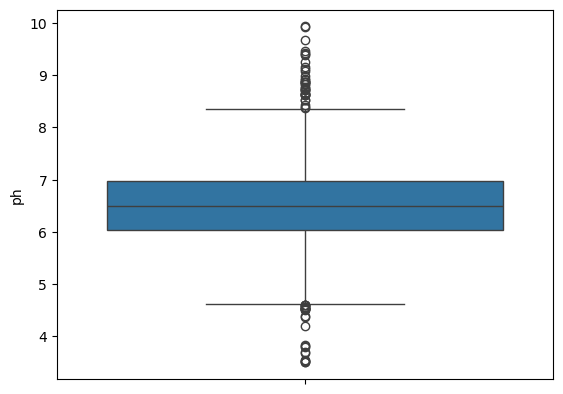

In [61]:
df['ph'].skew()
df['ph'].describe()
sns.boxplot(df['ph'])

In [62]:
percentile25 = df['ph'].quantile(0.25)
percentile75 = df['ph'].quantile(0.75)
percentile75


6.97012755075

In [63]:
iqr = percentile75 - percentile25
iqr

0.93856559525

In [64]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upperlimit", upper_limit)
print("lowerlimit", lower_limit)

upperlimit 8.377975943625
lowerlimit 4.623713562624999


In [65]:
df[df['ph']>upper_limit]

,N,P,K,temperature,humidity,ph,rainfall,label
209,28,74,81,18.012723,18.309681,8.753795,81.985688,chickpea
210,58,66,79,20.993736,19.334704,8.718193,93.552801,chickpea
222,31,78,76,17.572121,14.999275,8.519976,89.310507,chickpea
232,32,60,83,19.691417,19.442254,8.829273,91.760716,chickpea
233,22,78,76,17.848517,19.091729,8.621663,76.324707,chickpea
240,38,60,76,18.650541,17.808524,8.868741,77.927987,chickpea
241,59,55,79,20.367204,16.895743,8.766129,82.254558,chickpea
242,36,76,75,18.381204,16.638052,8.736338,70.520567,chickpea
246,52,60,79,19.453399,18.234907,8.380185,75.631757,chickpea
287,37,55,82,19.455918,18.022359,8.423874,78.449106,chickpea


In [66]:
df[df['K'] < lower_limit]

,N,P,K,temperature,humidity,ph,rainfall,label


In [67]:
df = df[df['K'] < upper_limit]
df.shape

(34, 8)

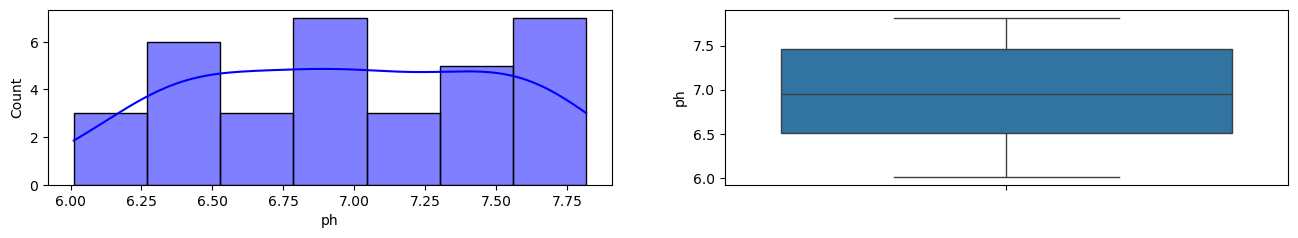

In [68]:
plt.figure(figsize=(16, 5))

# First subplot
plt.subplot(2, 2, 3)  
sns.histplot(df['ph'], kde=True, color='blue')
plt.subplot(2, 2, 4) 
sns.boxplot(df['ph'])
plt.show()

<Axes: ylabel='rainfall'>

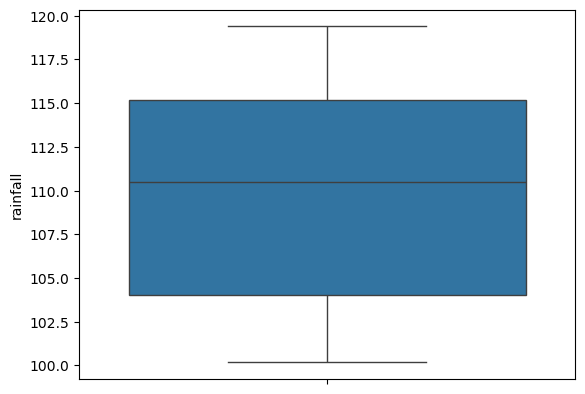

In [69]:
df['rainfall'].skew()
df['rainfall'].describe()
sns.boxplot(df['rainfall'])

In [74]:
 print("Unique classes in original df:", df['label'].nunique())

Unique classes in original df: 1


In [71]:
print(df['label'].unique())
print(df['label'].value_counts())

['orange']
label
orange    34
Name: count, dtype: int64


# Feature Scaling

# MinMax scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Step 1: Select only the numerical columns for scaling
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features]
y = df['label']  # Target column remains unchanged

In [ ]:
# Step 2: Initialize MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Apply MinMax scaling
X_scaled = scaler.fit_transform(X)

In [ ]:
#  Step 4: Create DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

#  Step 5: Add the label column back
minmax_scaled_df = pd.concat([X_scaled_df, y], axis=1)

# Step 6: Display result
print(minmax_scaled_df.head())


# Standization (Z-score Normalization)

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

NameError: name 'StandardScaler' is not defined

In [ ]:
# Step 4: Create DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 5: Add label column back
final_scaled_df = pd.concat([X_scaled_df, y], axis=1)

# Step 6: Display result
print(final_scaled_df.head())

In [ ]:
print(df['label'].unique())
print(df['label'].value_counts())


# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# 3. Encode text labels into numbers (needed for `c=...`)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

In [ ]:
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_scaled.shape

In [ ]:
X_pca.shape

In [ ]:
X_pca

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.clim(-0.5, len(le.classes_)-0.5)
plt.grid(True)
plt.show()

# Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: temperature vs rainfall, colored by crop (label)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='temperature',
    y='rainfall',
    hue='label',              # color by crop label
    palette='Set2',           # visually distinct colors
    s=80,                     # size of points
    edgecolor='black'
)

plt.title('Temperature vs Rainfall by Crop Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
